In [1]:
import pandas  as pd
import math
import numpy as np
import json
import statistics
from scipy import stats
import matplotlib as matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
with open('models_acc_ClusterCentroids.txt') as f:
    cluster_centroids = json.load(f)

with open('models_acc_RandomUnderSampler.txt') as f:
    random_undersampler = json.load(f)
    
with open('models_acc_SMOTE.txt') as f:
    smote = json.load(f)

In [3]:
df_randu=pd.DataFrame.from_dict(random_undersampler,orient='index').transpose()

In [4]:
df_randu.head()

,KNeighborsClassifier,DecisionTreeClassifier,MLPClassifier,RandomForestClassifier,LinearSVC
0,0.934010,0.913706,0.949239,0.918782,0.939086
1,0.939086,0.923858,0.964467,0.939086,0.959391
2,0.934010,0.903553,0.949239,0.928934,0.964467
3,0.934010,0.908629,0.949239,0.939086,0.944162
4,0.913265,0.903061,0.923469,0.897959,0.928571


## Histogramas

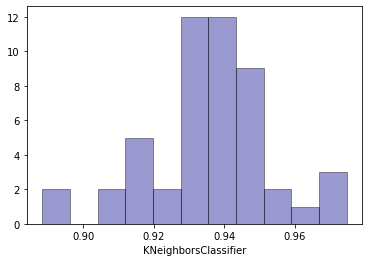

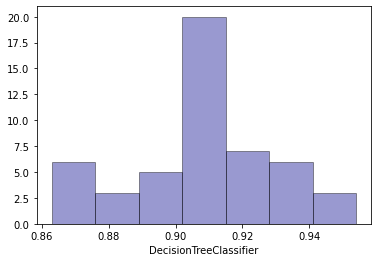

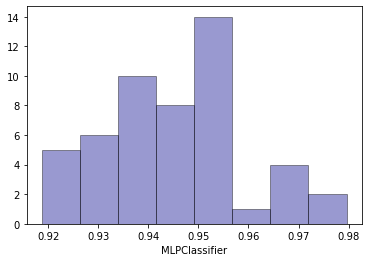

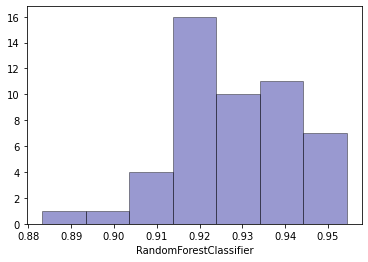

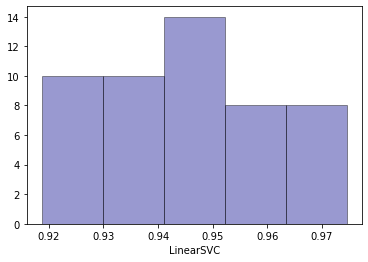

In [15]:
for col in list(df_randu):
    sns.distplot(df_randu[col], hist=True, kde=False, color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.show()

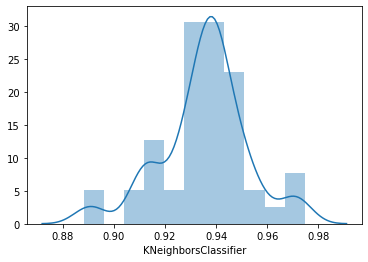

In [30]:
 sns.distplot(df_randu.KNeighborsClassifier)

## KS-TEST

In [7]:
for col in list(df_randu):
    print(col)
    print(stats.shapiro(df_randu[col]))
    print('-------')

KNeighborsClassifier
ShapiroResult(statistic=0.9572940468788147, pvalue=0.06848066300153732)
-------
DecisionTreeClassifier
ShapiroResult(statistic=0.9677106738090515, pvalue=0.1864873766899109)
-------
MLPClassifier
ShapiroResult(statistic=0.9589491486549377, pvalue=0.08032240718603134)
-------
RandomForestClassifier
ShapiroResult(statistic=0.9741191267967224, pvalue=0.337568461894989)
-------
LinearSVC
ShapiroResult(statistic=0.9634642004966736, pvalue=0.12416540086269379)
-------


## Wilcoxon Signed-Rank Test 

In [39]:
import itertools

combinations = list(itertools.combinations(list(df_randu), 2))

for pair in combinations:
    print(pair)
    print(stats.wilcoxon(df_randu[pair[0]], df_randu[pair[1]]))
    print('-------')

('KNeighborsClassifier', 'DecisionTreeClassifier')
WilcoxonResult(statistic=22.5, pvalue=1.5027917486775284e-08)
-------
('KNeighborsClassifier', 'MLPClassifier')
WilcoxonResult(statistic=205.0, pvalue=0.000708152895471336)
-------
('KNeighborsClassifier', 'RandomForestClassifier')
WilcoxonResult(statistic=130.0, pvalue=5.627115409929214e-05)
-------
('KNeighborsClassifier', 'LinearSVC')
WilcoxonResult(statistic=181.0, pvalue=0.000244603251869731)
-------
('DecisionTreeClassifier', 'MLPClassifier')
WilcoxonResult(statistic=0.0, pvalue=1.6091297629026016e-09)
-------
('DecisionTreeClassifier', 'RandomForestClassifier')
WilcoxonResult(statistic=151.5, pvalue=4.433253313598636e-06)
-------
('DecisionTreeClassifier', 'LinearSVC')
WilcoxonResult(statistic=0.0, pvalue=7.492246836952014e-10)
-------
('MLPClassifier', 'RandomForestClassifier')
WilcoxonResult(statistic=25.5, pvalue=2.7512173849414368e-08)
-------
('MLPClassifier', 'LinearSVC')
WilcoxonResult(statistic=396.5, pvalue=0.6575111195